In [ ]:
!pip install -U transformers

### Modelos de Hugging Face

#### Local Inference on GPU
Model page: https://huggingface.co/deepakshirkem/image-description_to_emotion

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/deepakshirkem/image-description_to_emotion)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="deepakshirkem/image-description_to_emotion")

In [25]:
# Modelo BLIP para generar descripciones
from transformers import pipeline, BlipProcessor, BlipForConditionalGeneration, AutoTokenizer, AutoModelForCausalLM
from transformers import AutoTokenizer, AutoModelForCausalLM
from PIL import Image
import requests
import torch
caption_model_name = "Salesforce/blip-image-captioning-large"
caption_processor = BlipProcessor.from_pretrained(caption_model_name)
caption_model = BlipForConditionalGeneration.from_pretrained(caption_model_name)

# Modelo para inferir emoción desde la descripción
emotion_model_name = "deepakshirkem/image-description_to_emotion"
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
emotion_model = AutoModelForCausalLM.from_pretrained(emotion_model_name)

emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

Device set to use cuda:0
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


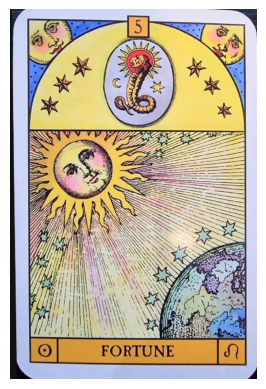

In [32]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/Alchemic.jpeg").convert("RGB")

plt.imshow(image)
plt.axis("off")
plt.show()

In [33]:
inputs = caption_processor(image, return_tensors="pt")
caption_ids = caption_model.generate(**inputs, max_new_tokens=50)
description = caption_processor.decode(caption_ids[0], skip_special_tokens=True)
print("Descripción generada:", description)

Descripción generada: a close up of a tarot card with a snake and sun


In [34]:
prompt = f"Describe the emotion conveyed by this image: {description}"
inputs = emotion_tokenizer(prompt, return_tensors="pt")
outputs = emotion_model.generate(**inputs, max_new_tokens=40)
emotion_text = emotion_tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Texto emocional:", emotion_text)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


💬 Texto emocional: Describe the emotion conveyed by this image: a close up of a tarot card with a snake and sun in the center. The card is associated with the number 13 and the idea of the "end of the world." The image conveys a sense of impending doom or catastrophe.

### Step


In [37]:
emotions = emotion_classifier(emotion_text)[0]

print("Distribución emocional:")
for e in emotions:
    print(f"{e['label']}: {e['score']:.3f}")

Distribución emocional:
anger: 0.016
disgust: 0.034
fear: 0.785
joy: 0.005
neutral: 0.124
sadness: 0.031
surprise: 0.005


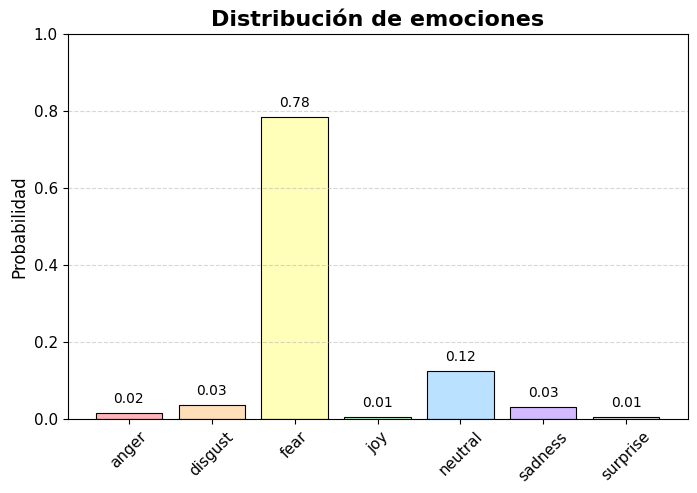

In [38]:
labels = [e['label'] for e in emotions]
scores = [e['score'] for e in emotions]
colors = ["#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF", "#D3BAFF", "#E0E0E0"]  # tonos pastel

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=colors, edgecolor="black", linewidth=0.8)
plt.title("Distribución de emociones", fontsize=16, fontweight='bold')
plt.ylabel("Probabilidad", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.gca().set_facecolor("white")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()